# Simple NN to calc logic function

In [1]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
nw = models.Sequential()

In [3]:
nw.add(layers.Dense(4, activation='relu', input_shape=(2,)))
nw.add(layers.Dense(1, activation='sigmoid'))

In [4]:
nw.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
import numpy
v = list()
for i in range(1000):
    v.append([0, 0, 0])
    v.append([0, 1, 1])
    v.append([1, 0, 1])
    v.append([1, 1, 0])

In [6]:
import pandas
import numpy

In [7]:
df = pandas.DataFrame(v, columns=['x1', 'x2', 'y'])

In [8]:
train = df[:3000]
val = df[3000:3500]
test = df[3500:]

In [9]:
history = nw.fit(train[['x1', 'x2']], train['y'], epochs=30, batch_size=4, validation_data=(val[['x1', 'x2']], val['y']))

Train on 3000 samples, validate on 500 samples
Epoch 1/30
3000/3000 [==============================] - 1s 378us/step - loss: 0.6387 - accuracy: 0.7587 - val_loss: 0.5950 - val_accuracy: 1.0000
Epoch 2/30
3000/3000 [==============================] - 2s 540us/step - loss: 0.5370 - accuracy: 0.9943 - val_loss: 0.4713 - val_accuracy: 1.0000
Epoch 3/30
3000/3000 [==============================] - 1s 491us/step - loss: 0.3938 - accuracy: 1.0000 - val_loss: 0.3166 - val_accuracy: 1.0000
Epoch 4/30
3000/3000 [==============================] - 1s 495us/step - loss: 0.2419 - accuracy: 1.0000 - val_loss: 0.1728 - val_accuracy: 1.0000
Epoch 5/30
3000/3000 [==============================] - 1s 453us/step - loss: 0.1199 - accuracy: 1.0000 - val_loss: 0.0760 - val_accuracy: 1.0000
Epoch 6/30
3000/3000 [==============================] - 3s 857us/step - loss: 0.0485 - accuracy: 1.0000 - val_loss: 0.0269 - val_accuracy: 1.0000
Epoch 7/30
3000/3000 [==============================] - 2s 706us/step - loss:

In [10]:
import matplotlib.pyplot as plt

In [11]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [12]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(acc_values) + 1)

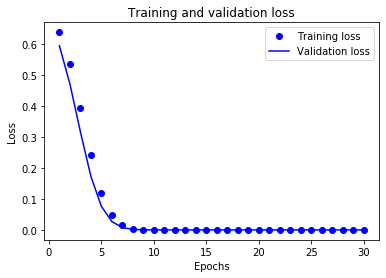

In [13]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

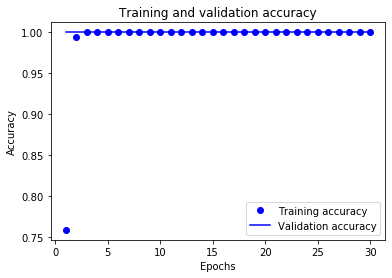

In [14]:
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(2,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train[['x1', 'x2']], train['y'], epochs=7, batch_size=4, validation_data=(val[['x1', 'x2']], val['y']))

Train on 3000 samples, validate on 500 samples
Epoch 1/7
3000/3000 [==============================] - 2s 795us/step - loss: 0.5602 - accuracy: 0.9033 - val_loss: 0.4761 - val_accuracy: 1.0000
Epoch 2/7
3000/3000 [==============================] - 3s 957us/step - loss: 0.3994 - accuracy: 1.0000 - val_loss: 0.3238 - val_accuracy: 1.0000
Epoch 3/7
3000/3000 [==============================] - 3s 918us/step - loss: 0.2604 - accuracy: 1.0000 - val_loss: 0.2020 - val_accuracy: 1.0000
Epoch 4/7
3000/3000 [==============================] - 2s 759us/step - loss: 0.1564 - accuracy: 1.0000 - val_loss: 0.1166 - val_accuracy: 1.0000
Epoch 5/7
3000/3000 [==============================] - 2s 752us/step - loss: 0.0873 - accuracy: 1.0000 - val_loss: 0.0633 - val_accuracy: 1.0000
Epoch 6/7
3000/3000 [==============================] - 3s 849us/step - loss: 0.0467 - accuracy: 1.0000 - val_loss: 0.0333 - val_accuracy: 1.0000
Epoch 7/7
3000/3000 [==============================] - 3s 851us/step - loss: 0.0245

In [17]:
model.evaluate(test[['x1', 'x2']], test['y'])

500/500 [==============================] - 0s 63us/step


[0.017316732555627823, 1.0]

In [18]:
pred_y = model.predict(test[['x1', 'x2']])

In [19]:
test['y'].subtract(numpy.round(pred_y, 0).reshape(1, 500)[0]).sum()

0.0

In [20]:
model.save('nn_model_xor.h5')

In [21]:
df.to_csv('xor_df.csv', header=True, sep=',')